<a href="https://colab.research.google.com/github/aliparsaa/aliparsaa/blob/main/robot_trade0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anaytrading gym

     |████████████████████████████████| 411.5 MB 7.0 kB/s 
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 240 kB 63.2 MB/s 
ERROR: Could not find a version that satisfies the requirement gym-anaytrading (from versions: none)
ERROR: No matching distribution found for gym-anaytrading


In [4]:
!pip install stable-baselines[mpi]

  Using cached stable_baselines-2.10.2-py3-none-any.whl (240 kB)
     |████████████████████████████████| 2.4 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.1-cp37-cp37m-linux_x86_64.whl size=2180618 sha256=f07db83e0820e96c93073cac5b2960a3a7e68382625ba6cf294e4e0ac5ab1b71
  Stored in directory: /root/.cache/pip/wheels/91/be/c0/2b0347be1de5cd8ca9fe67da7ec8c3fe8930fcb6b0df6f2255
Successfully built mpi4py


In [2]:
!pip install gym-anytrading

     |████████████████████████████████| 171 kB 5.1 MB/s 


In [7]:
!pip install tensorflow==1.15


  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
     |████████████████████████████████| 3.8 MB 4.9 MB/s 
     |████████████████████████████████| 50 kB 4.9 MB/s 
     |████████████████████████████████| 503 kB 51.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b3ef982fdafa9f294b9eb5e21671c51c4b6cb20bd38f130b143af22d103379dd
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gas

info: {'total_reward': 185.39999999999554, 'total_profit': 0.996017551937167, 'position': 1}


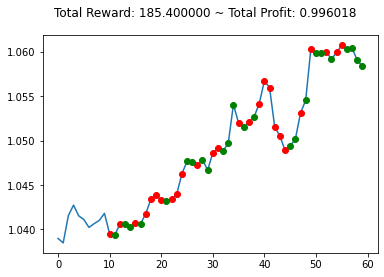

In [8]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()


In [9]:
import gym
import gym_anytrading
#stable baseline
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 

from stable_baselines.common.vec_env import DummyVecEnv
#from stable_baselines import A2C
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
df=pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-23,6006.000000,6075.589844,5732.470215,5930.319824,5930.319824,2.401840e+09
1,2017-10-24,5935.520020,5935.520020,5504.180176,5526.640137,5526.640137,2.735700e+09
2,2017-10-25,5524.600098,5754.330078,5397.879883,5750.799805,5750.799805,1.966990e+09
3,2017-10-26,5747.950195,5976.799805,5721.220215,5904.830078,5904.830078,1.905040e+09
4,2017-10-27,5899.740234,5988.390137,5728.819824,5780.899902,5780.899902,1.710130e+09


In [11]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [16]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-23,6006.000000,6075.589844,5732.470215,5930.319824,5930.319824,2.401840e+09
1,2017-10-24,5935.520020,5935.520020,5504.180176,5526.640137,5526.640137,2.735700e+09
2,2017-10-25,5524.600098,5754.330078,5397.879883,5750.799805,5750.799805,1.966990e+09
3,2017-10-26,5747.950195,5976.799805,5721.220215,5904.830078,5904.830078,1.905040e+09
4,2017-10-27,5899.740234,5988.390137,5728.819824,5780.899902,5780.899902,1.710130e+09
...,...,...,...,...,...,...,...
1427,2021-09-19,48268.855469,48328.367188,46919.804688,47260.218750,47260.218750,2.696772e+10
1428,2021-09-20,47261.406250,47328.199219,42598.914063,42843.800781,42843.800781,4.390985e+10
1429,2021-09-21,43012.234375,43607.609375,39787.609375,40693.675781,40693.675781,4.870109e+10
1430,2021-09-22,40677.953125,43978.621094,40625.632813,43574.507813,43574.507813,3.813971e+10


In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-23,6006.000000,6075.589844,5732.470215,5930.319824,5930.319824,2.401840e+09
1,2017-10-24,5935.520020,5935.520020,5504.180176,5526.640137,5526.640137,2.735700e+09
2,2017-10-25,5524.600098,5754.330078,5397.879883,5750.799805,5750.799805,1.966990e+09
3,2017-10-26,5747.950195,5976.799805,5721.220215,5904.830078,5904.830078,1.905040e+09
4,2017-10-27,5899.740234,5988.390137,5728.819824,5780.899902,5780.899902,1.710130e+09


In [19]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-23,6006.000000,6075.589844,5732.470215,5930.319824,5930.319824,2.401840e+09
2017-10-24,5935.520020,5935.520020,5504.180176,5526.640137,5526.640137,2.735700e+09
2017-10-25,5524.600098,5754.330078,5397.879883,5750.799805,5750.799805,1.966990e+09
2017-10-26,5747.950195,5976.799805,5721.220215,5904.830078,5904.830078,1.905040e+09
2017-10-27,5899.740234,5988.390137,5728.819824,5780.899902,5780.899902,1.710130e+09


In [22]:
env=gym.make('stocks-v0', df=df , frame_bound=(10,100),window_size=5)
env.prices

array([ 5753.089844,  6153.850098,  6130.529785,  6468.399902,
        6767.310059,  7078.5     ,  7207.759766,  7379.950195,
        7407.410156,  7022.759766,  7144.379883,  7459.689941,
        7143.580078,  6618.140137,  6357.600098,  5950.069824,
        6559.490234,  6635.75    ,  7315.540039,  7871.689941,
        7708.990234,  7790.149902,  8036.490234,  8200.639648,
        8071.259766,  8253.549805,  8038.77002 ,  8253.69043 ,
        8790.919922,  9330.549805,  9818.349609, 10058.799805,
        9888.610352, 10233.599609, 10975.599609, 11074.599609,
       11323.200195, 11657.200195, 11916.700195, 14291.5     ,
       17899.699219, 16569.400391, 15178.200195, 15455.400391,
       16936.800781, 17415.400391, 16408.199219, 16564.      ,
       17706.900391, 19497.400391, 19140.800781, 19114.199219,
       17776.699219, 16624.599609, 15802.900391, 13831.799805,
       14699.200195, 13925.799805, 14026.599609, 16099.799805,
       15838.5     , 14606.5     , 14656.200195, 12952.

In [23]:
env.signal_features

array([[ 5753.089844,     0.      ],
       [ 6153.850098,   400.760254],
       [ 6130.529785,   -23.320313],
       [ 6468.399902,   337.870117],
       [ 6767.310059,   298.910157],
       [ 7078.5     ,   311.189941],
       [ 7207.759766,   129.259766],
       [ 7379.950195,   172.190429],
       [ 7407.410156,    27.459961],
       [ 7022.759766,  -384.65039 ],
       [ 7144.379883,   121.620117],
       [ 7459.689941,   315.310058],
       [ 7143.580078,  -316.109863],
       [ 6618.140137,  -525.439941],
       [ 6357.600098,  -260.540039],
       [ 5950.069824,  -407.530274],
       [ 6559.490234,   609.42041 ],
       [ 6635.75    ,    76.259766],
       [ 7315.540039,   679.790039],
       [ 7871.689941,   556.149902],
       [ 7708.990234,  -162.699707],
       [ 7790.149902,    81.159668],
       [ 8036.490234,   246.340332],
       [ 8200.639648,   164.149414],
       [ 8071.259766,  -129.379882],
       [ 8253.549805,   182.290039],
       [ 8038.77002 ,  -214.779785],
 

In [ ]:
state=env.reset()
while True:
  action=env.action_space.sample()
  n_state, reward,done, info=env.step(action)
  if done:
    print("info",info)
    break 
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()  

In [30]:
env_maker= lambda :gym.make('stocks-v0', df=df , frame_bound=(10,100),window_size=5)
env=DummyVecEnv([env_maker])

In [38]:
#!pip install stable-baselines
#!pip install tensorflow==1.14.0
#!pip install stable-baselines[mpi]==2.10.0
from stable_baselines import A2C

AttributeError: ignored

In [37]:
model=A2C('M1pLstmpolicy', env, verbose=1)
model,learn(total_timesteps=100000)

NameError: ignored